<IPython.core.display.Javascript object>


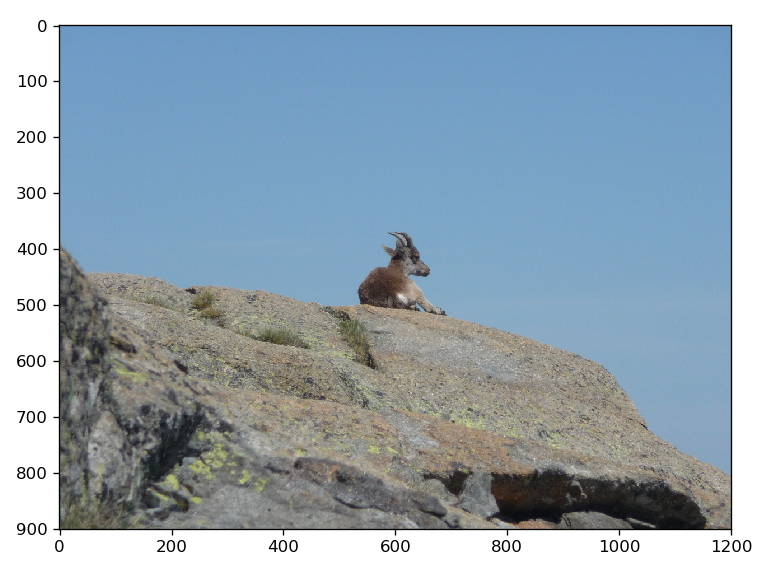

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook
from skimage.io import imread,imshow
from skimage.color import rgb2hsv

im = imread('gredos.jpg')

plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


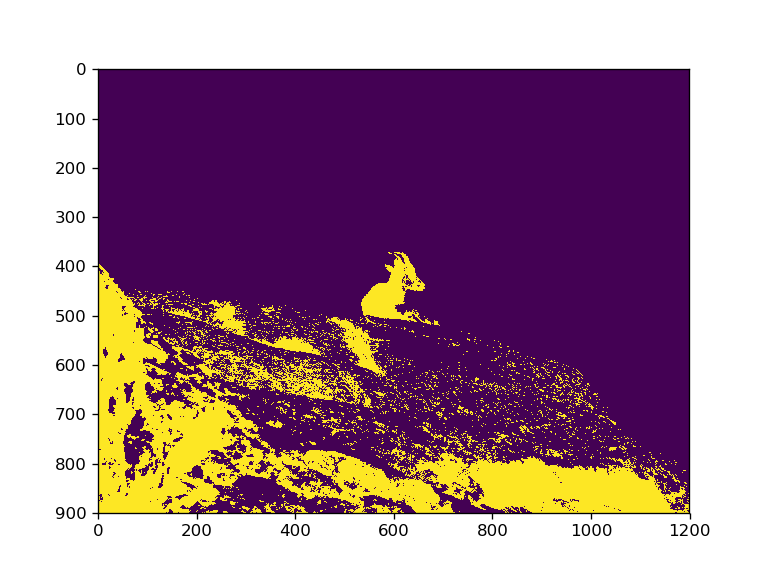

<IPython.core.display.Javascript object>


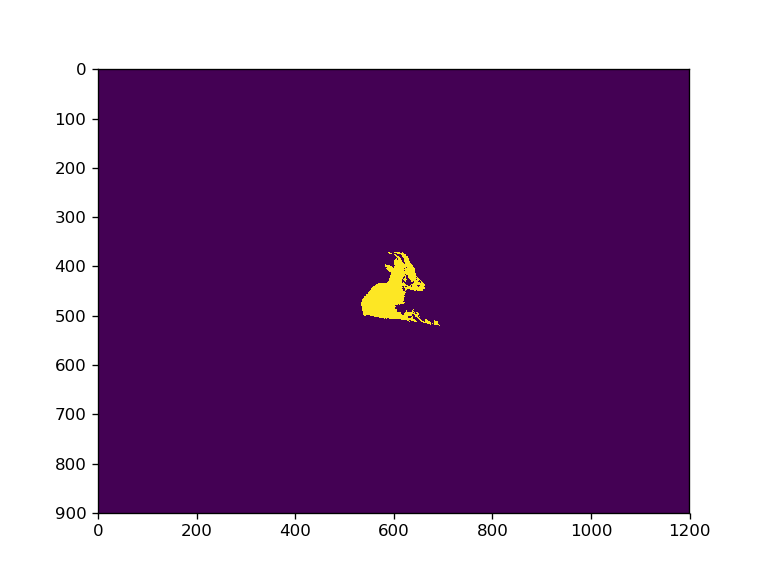

In [25]:
def distance_color_space(im, coords):
    refcolor = im[coords[0],coords[1]]
    dmap = np.sqrt(((im-refcolor)**2).sum(axis=2))
    
    return dmap

def get_neighbours(coords):
    y = coords[0]
    x = coords[1]
    neighbours = [(y-1,x), (y+1,x), (y,x-1), (y,x+1)]
    
    return neighbours

im = imread('gredos.jpg')

coords = (450,580)
tolerance = 0.35

dmap = distance_color_space(im.astype('float'), coords)
dmap /= dmap.max()
mask_tolerance = dmap<tolerance

mask_result = np.zeros(dmap.shape)
mask_result[coords] = True

candidates = get_neighbours(coords)

i = 0
visited = []
while( len(candidates) > 0 ):
    coords = candidates.pop(0)
    visited += [coords]
    i += 1
    # Check if it's a valid candidate
    if mask_tolerance[coords]:
        # Add its own neighbours to the list
        new_candidates = get_neighbours(coords)
        for candidate in new_candidates:
            if candidate not in candidates and candidate not in visited and candidate[0] >= 0 and candidate[0]<im.shape[0] and candidate[1] >= 0 and candidate[1] < im.shape[1] :
                candidates += [candidate]
        # Add it to the result mask
        mask_result[coords] = True
    

plt.figure()
plt.imshow(mask_tolerance)
plt.figure()
plt.imshow(mask_result)
plt.show()

<IPython.core.display.Javascript object>


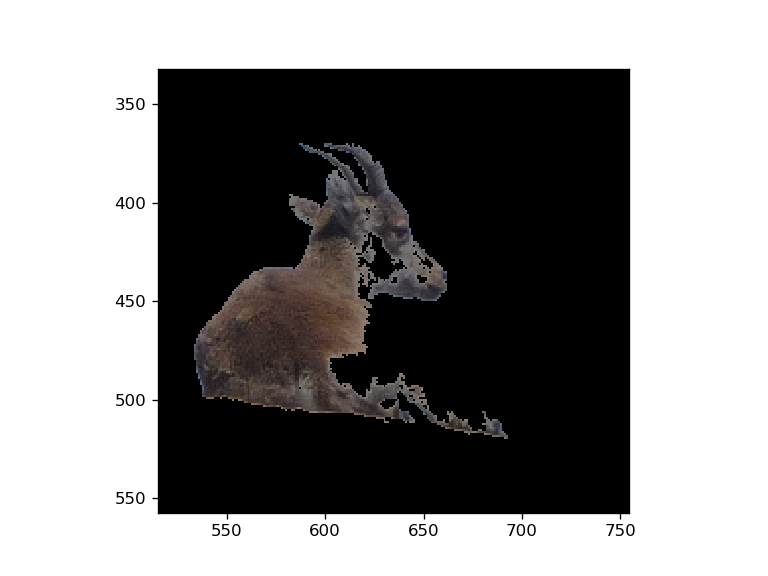

In [26]:
im_m = im.copy()
im_m[mask_result==False] = 0

plt.figure()
plt.imshow(im_m)
plt.show()

In [13]:
a = [1,2,3]
b = [4,5]
a+b

[1, 2, 3, 4, 5]